In [81]:
#IMPORT REQUIRED LIBRARIES
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.impute import KNNImputer

In [82]:
sys.path.append('../')

In [83]:
os.listdir('../data')

['creditcard.csv', 'Fraud_Data.csv', 'IpAddress_to_Country.csv']

In [84]:
#READING CREDIT CARD DATA
creditcard_df = pd.read_csv('../data/creditcard.csv', low_memory=False)

In [85]:
print(creditcard_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [86]:
#parse Time to datetime type
creditcard_df['Time']=pd.to_datetime(creditcard_df['Time'])

In [87]:
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01 00:00:00.000000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1970-01-01 00:00:00.000000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1970-01-01 00:00:00.000000001,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1970-01-01 00:00:00.000000001,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1970-01-01 00:00:00.000000002,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [88]:
#DISTRIBUTION OF CREDIT CARD DATA
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1970-01-01 00:00:00.000094813,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
min,1970-01-01 00:00:00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,1970-01-01 00:00:00.000054201,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1970-01-01 00:00:00.000084692,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1970-01-01 00:00:00.000139320,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,1970-01-01 00:00:00.000172792,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000
std,NaN,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527


In [89]:
creditcard_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [90]:
#CHECKING FOR MISSING VALUES 
missing_values = creditcard_df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [91]:
# Remove Duplicates
creditcard_df.drop_duplicates(inplace=True)
print("Removed duplicate rows.")

Removed duplicate rows.



Fraud_data overview


In [92]:
#Reading fraud data
fraud_df = pd.read_csv('../data/Fraud_Data.csv', low_memory=False)

In [93]:
print(fraud_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None


In [94]:
#parse Time to datetime type
fraud_df['purchase_time']=pd.to_datetime(fraud_df['purchase_time'])

In [95]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [96]:
fraud_df.describe()

,user_id,purchase_time,purchase_value,age,ip_address,class
count,151112.000000,151112,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,2015-06-16 02:56:38.759952896,36.935372,33.140704,2.152145e+09,0.093646
min,2.000000,2015-01-01 00:00:44,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,2015-04-18 14:41:25.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,2015-06-18 13:46:17.500000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,2015-08-17 18:48:31.500000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,2015-12-16 02:56:05,154.000000,76.000000,4.294850e+09,1.000000
std,115369.285024,NaN,18.322762,8.617733,1.248497e+09,0.291336


In [97]:
fraud_df.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [98]:
#chaecking data types
fraud_df.dtypes

user_id                    int64
signup_time               object
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

In [99]:
#CHECKING FOR MISSING VALUES 
missing_values = fraud_df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [100]:
# Remove Duplicates
fraud_df.drop_duplicates(inplace=True)
print("Removed duplicate rows.")

Removed duplicate rows.


Ip address data overview


In [101]:
#Reading IP address data
ipaddress_df = pd.read_csv('../data/IpAddress_to_Country.csv', low_memory=False)

In [102]:
print(ipaddress_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


In [103]:
ipaddress_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [104]:
#checking the distribution
ipaddress_df.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [105]:
ipaddress_df.columns

Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')

In [106]:
#checking data types
ipaddress_df.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

In [107]:
#CHECKING FOR MISSING VALUES 
missing_values = ipaddress_df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [108]:
# Remove Duplicates
ipaddress_df.drop_duplicates(inplace=True)
print("Removed duplicate rows.")

Removed duplicate rows.


In [109]:

 # The classes are heavily skewed we need to solve this issue 
print('No Frauds', round(creditcard_df['Class'].value_counts()[0]/len(creditcard_df) * 100,2), '% of the dataset')
print('Frauds', round(creditcard_df['Class'].value_counts()[1]/len(creditcard_df) * 100,2), '% of the dataset')



No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

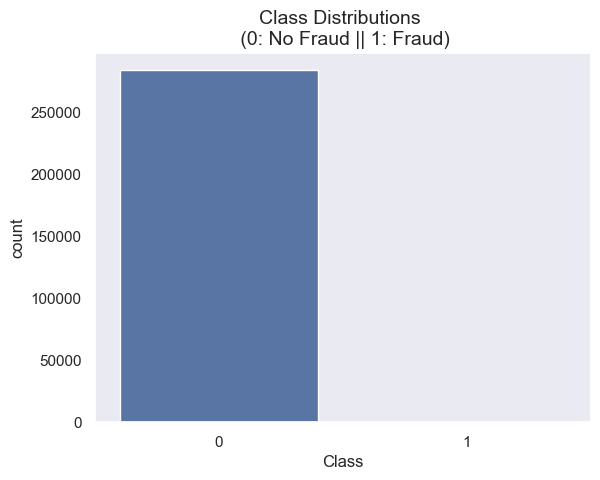

In [110]:
sns.countplot(x = 'Class', data=creditcard_df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

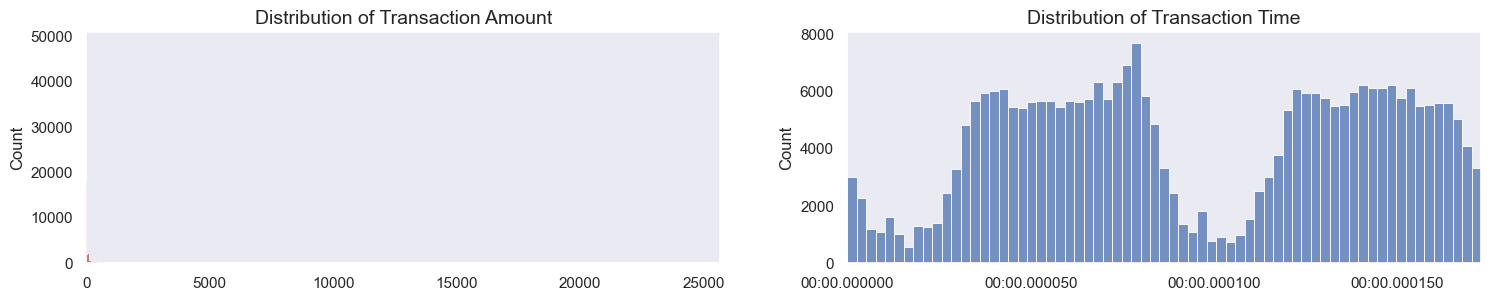

In [111]:
#Histplot of numeric columns
fig, ax = plt.subplots(1, 2, figsize=(18,3))

amount_val = creditcard_df['Amount'].values
time_val = creditcard_df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

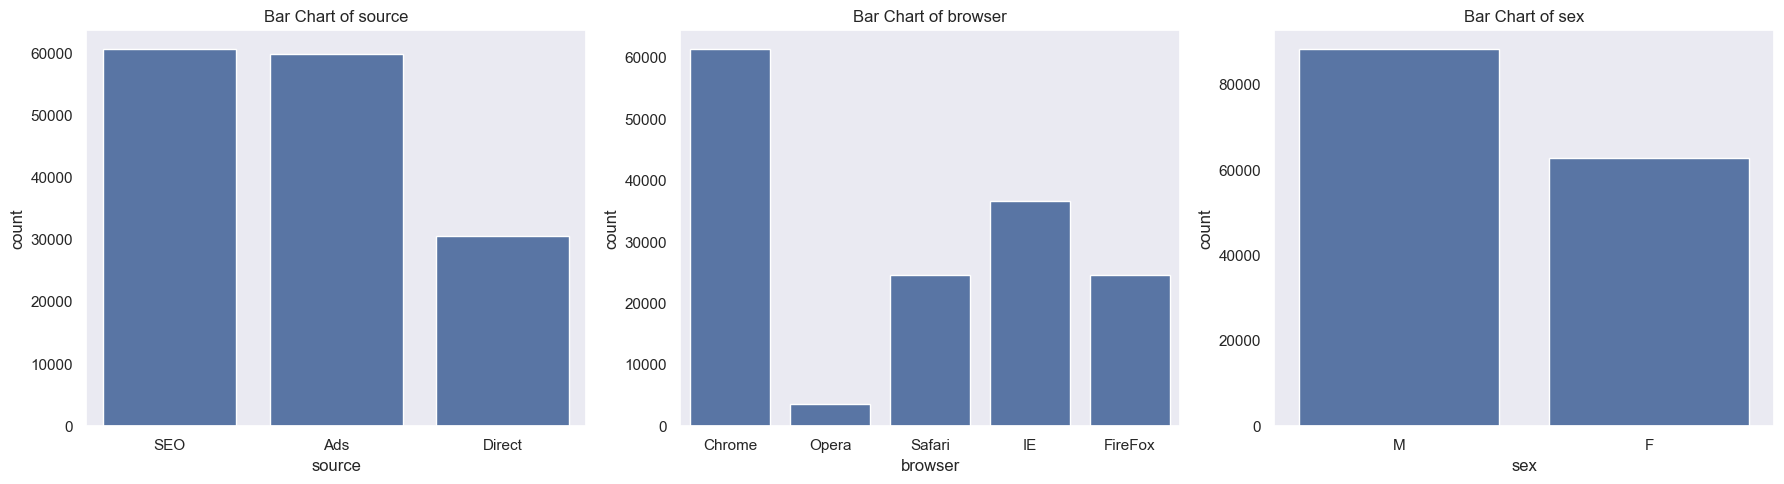

In [112]:

# Bar plot of categorical features

# Create subplots
sns.set_theme(style="dark")
# Define the categorical features
categorical_features = ['source', 'browser', 'sex']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))  # 1 row, 3 columns

# Loop through the features and plot on respective axes
for i, feature in enumerate(categorical_features):
    if feature in fraud_df.columns:
        sns.countplot(x=feature, data=fraud_df, ax=axes[i])
        axes[i].set_title(f'Bar Chart of {feature}')

# Adjust the layout
plt.tight_layout()
plt.show()

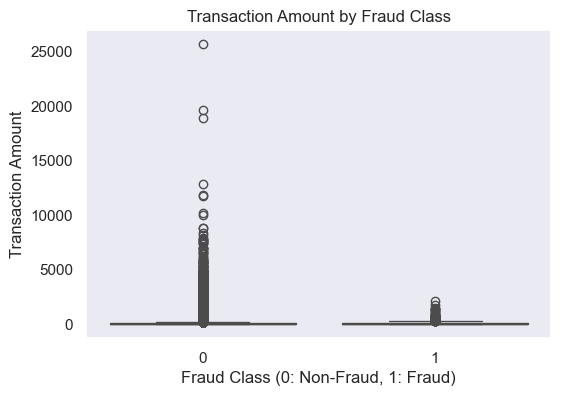

In [ ]:
# Bivariate Analysis
# Transaction Amount vs Fraud Class
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=creditcard_df)
plt.title('Transaction Amount by Fraud Class')
plt.xlabel('Fraud Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

# Time vs Fraud Class
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Time', data=creditcard_df)
plt.title('Transaction Time by Fraud Class')
plt.xlabel('Fraud Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Time (in seconds)')
plt.show()

#Fraud Dataset Correlation Heatmap
fraud_numerical_features = ['purchase_value', 'age']  
if set(fraud_numerical_features).issubset(fraud_df.columns):
    plt.figure(figsize=(8, 6))
    sns.heatmap(fraud_df[fraud_numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap - Fraud Dataset (Purchase Value, Age)')
    plt.show()

MERGING FRAUD AND IP ADDRESS DATA FOR GEOLOCATION ANALYSIS

In [60]:
# Sort both DataFrames by ip_address and lower_bound_ip_address for asof merge
fraud_data = fraud_df.sort_values(by='ip_address')
ip_data = ipaddress_df.sort_values(by='lower_bound_ip_address')

# Perform an asof merge on ip_address to find the closest lower_bound_ip_address
merged_data = pd.merge_asof(
    fraud_data, 
    ip_data, 
    left_on='ip_address', 
    right_on='lower_bound_ip_address',
    direction='backward'  # Ensures that we match the closest lower bound less than or equal to ip_address
)

# Now filter rows where the ip_address falls within the lower and upper bounds
merged_data = merged_data[
    (merged_data['ip_address'] >= merged_data['lower_bound_ip_address']) &
    (merged_data['ip_address'] <= merged_data['upper_bound_ip_address'])
]


display(merged_data)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,1.677824e+07,1.677926e+07,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,1.680998e+07,1.684275e+07,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,1.684326e+07,1.684378e+07,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,1.692467e+07,1.694106e+07,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,1.694106e+07,1.697382e+07,Thailand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131724,33024,2015-04-12 21:07:04,2015-05-12 22:42:35,56,PRYMTRKRYXEZC,Direct,Opera,F,18,3.757992e+09,0,3.757965e+09,3.758031e+09,China
131725,62132,2015-08-07 10:46:59,2015-08-27 22:35:23,36,XAZBVQEIGZMVM,Direct,Chrome,F,36,3.758008e+09,0,3.757965e+09,3.758031e+09,China
131726,363333,2015-02-09 07:56:12,2015-03-19 16:55:29,37,LPFTNUDBBWDVD,SEO,FireFox,M,42,3.758019e+09,0,3.757965e+09,3.758031e+09,China
131727,340800,2015-05-10 19:31:22,2015-05-15 09:27:33,9,VUDMWVCEHXMCV,Direct,Chrome,F,37,3.758029e+09,0,3.757965e+09,3.758031e+09,China


FEATURE ENGINEERING

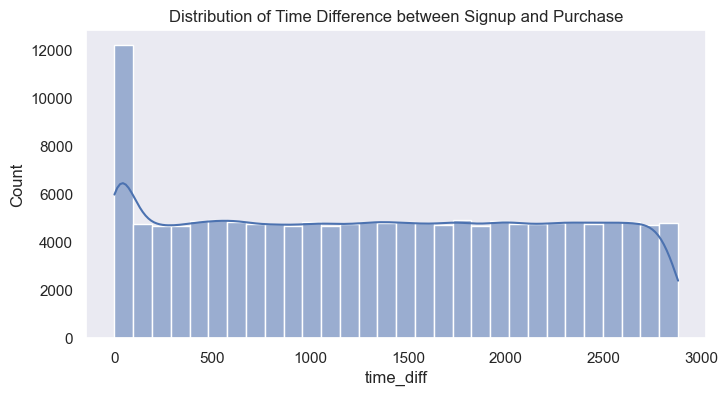

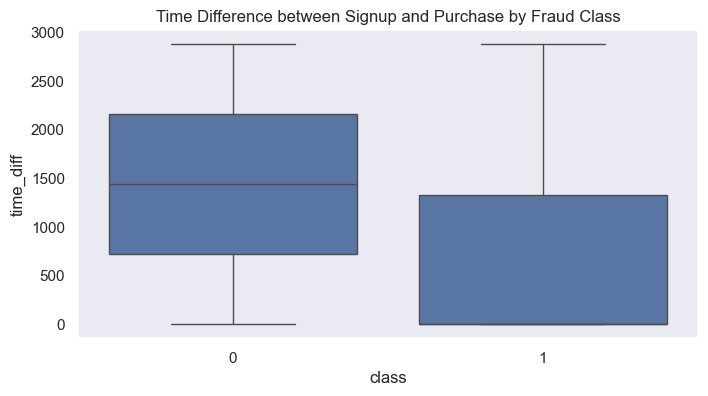

In [71]:
#  Plot time difference between signup_time and purchase_time
if 'signup_time' in fraud_data.columns and 'purchase_time' in fraud_data.columns:
    # Convert to datetime if not already done
    fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], errors='coerce')
    fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')

    # Create a new feature for the time difference
    fraud_data['time_diff'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds() / 3600.0  # In hours

    # Plot the time difference
    plt.figure(figsize=(8, 4))
    sns.histplot(fraud_data['time_diff'], kde=True, bins=30)
    plt.title('Distribution of Time Difference between Signup and Purchase')
    plt.show()

    # Analyze time difference by fraud class
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='class', y='time_diff', data=fraud_data)
    plt.title('Time Difference between Signup and Purchase by Fraud Class')
    plt.show()

In [76]:
# Fraud_Data

# 5.1 Transaction Frequency (Count of transactions per user)
merged_data['transaction_count'] = merged_data.groupby('user_id')['user_id'].transform('count')

# 5.2 Time-based features: Hour of the day and Day of the week for purchase_time
merged_data['hour_of_day'] = merged_data['purchase_time'].dt.hour
merged_data['day_of_week'] = merged_data['purchase_time'].dt.dayofweek

# creditcard.csv

# 5.3 Time-based features: Convert 'Time' into days
creditcard_df['time_in_days'] = creditcard_df['Time'] / (60*60*24)  # Convert seconds to days

AttributeError: Can only use .dt accessor with datetimelike values